In [65]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as scispec
import scipy.optimize as opt

# Beam waists

In [66]:
# First thing we need to do is try and calculate how the beam looks at the focus.
# Following Principles of Nano-Optics, Lukas Novotny (2006)

In [67]:
def fw(f0, theta, thetam):
    return np.exp(-1/f0**2*np.sin(theta)**2/np.sin(thetam)**2)

c = 3*10**8
eps0 = 8.854*10**(-12)
wavelength = 1064*10**(-9)
omega = 2*np.pi*c/wavelength
k = omega/c
n1 = 1
n2 = 1.5
f0 = 2
E0 = 1
f = 3.13*10**(-3)
NA = 0.9
thetam = np.arcsin(NA)
theta = np.linspace(0, thetam, 1000)
z = 0
rhol = np.linspace(-1*wavelength, 1*wavelength, 100)
phi = 0
Intensrho = []
for rho in rhol:
    I00 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1+np.cos(theta))*scispec.jv(0, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I01 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)**2*scispec.jv(1, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I02 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1-np.cos(theta))*scispec.jv(2, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    Intens = k**2*f**2/4*np.sqrt(n1/n2)*E0**2*(np.abs(I00+I02*np.cos(2*phi))**2 + np.abs(I01*np.sin(2*phi))**2 + np.abs(-2j*I02*np.sin(phi))**2)
    Intensrho.append(Intens)
    
phi = np.pi/2
Intensrho2 = []
for rho in rhol:
    I00 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1+np.cos(theta))*scispec.jv(0, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I01 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)**2*scispec.jv(1, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I02 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1-np.cos(theta))*scispec.jv(2, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    Intens = k**2*f**2/4*np.sqrt(n1/n2)*E0**2*(np.abs(I00+I02*np.cos(2*phi))**2 + np.abs(I01*np.sin(2*phi))**2 + np.abs(-2j*I02*np.sin(phi))**2)
    Intensrho2.append(Intens)
    
rho = 0
phi = 0
zl = np.linspace(-1*wavelength, 1*wavelength, 100)
Intensz = []
for z in zl:
    I00 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1+np.cos(theta))*scispec.jv(0, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I01 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)**2*scispec.jv(1, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    I02 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1-np.cos(theta))*scispec.jv(2, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
    Intens = k**2*f**2/4*np.sqrt(n1/n2)*E0**2*(np.abs(I00+I02*np.cos(2*phi))**2 + np.abs(I01*np.sin(2*phi))**2 + np.abs(-2j*I02*np.sin(phi))**2)
    Intensz.append(Intens)
    
print(Intensrho[50])
print(Intensrho2[50])
print(Intensz[50])

36999666.64668036
36993617.70872995
37022150.77538789


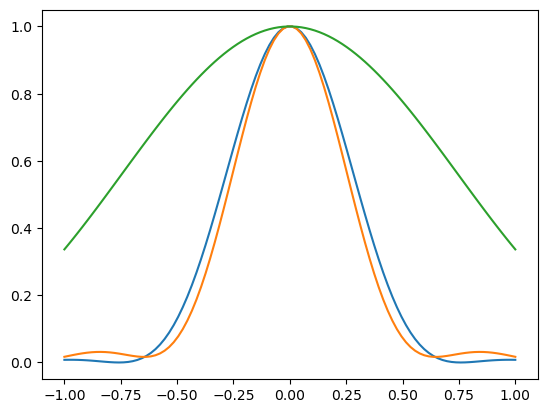

In [68]:
plt.plot(rhol/wavelength, Intensrho/Intensrho[50])
plt.plot(rhol/wavelength, Intensrho2/Intensrho2[50])
plt.plot(zl/wavelength, Intensz/Intensz[50])

In [69]:
# Now fit with Gaussian - just doing normalised fits since only care about widths here

def Gaussian_intens(x, wx):
    return np.exp(-2*x**2/wx**2)

def Gaussian_prop_intens(z, z0):
    return 1/(1+(z/z0)**2)
lb = 25
ub = 75
fitx, covx = opt.curve_fit(Gaussian_intens, rhol[lb:ub], Intensrho[lb:ub]/Intensrho[50], p0 = 500*10**(-9))
fity, covy = opt.curve_fit(Gaussian_intens, rhol[lb:ub], Intensrho2[lb:ub]/Intensrho2[50], p0 = 500*10**(-9))
fitz, covz = opt.curve_fit(Gaussian_prop_intens, zl[lb:ub], Intensz[lb:ub]/Intensz[50], p0 = 500*10**(-9))
print(fitx)
print(fity)
print(fitz)

fittedx = Gaussian_intens(rhol, fitx[0])
fittedy = Gaussian_intens(rhol, fity[0])
fittedz = Gaussian_prop_intens(zl, fitz[0])

[5.50106912e-07]
[4.92961765e-07]
[1.01591351e-06]


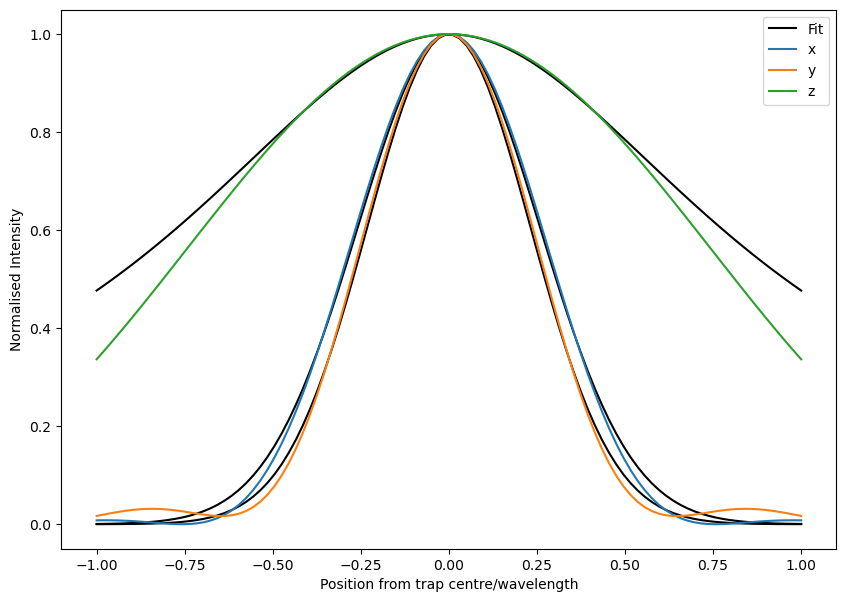

In [70]:
plt.figure(figsize = (10,7))
plt.plot(rhol/wavelength, fittedx, 'k', label = 'Fit')
plt.plot(rhol/wavelength, fittedy, 'k')
plt.plot(zl/wavelength, fittedz, 'k')

plt.plot(rhol/wavelength, Intensrho/Intensrho[50], label = 'x')
plt.plot(rhol/wavelength, Intensrho2/Intensrho2[50], label = 'y')
plt.plot(zl/wavelength, Intensz/Intensz[50], label = 'z')

plt.ylabel('Normalised Intensity')
plt.xlabel('Position from trap centre/wavelength')
plt.legend()

In [71]:
#Paraxial approximation:

w0 = 2*n1/k/NA
z0 = k*w0**2/2
print(w0)
print(z0)

3.763130209995037e-07
4.1812557888833745e-07


In [72]:
# Our modification factors:

modx = fitx[0]/w0
mody = fity[0]/w0
modz = fitz[0]/z0

print(modx)
print(mody)
print(modz)
print(modx/modz)

1.4618333168607969
1.3099779628113863
2.4296851603314242
0.601655449326362


In [73]:
(modx+mody)/2

1.3859056398360916

In [ ]:
def Gaussian_intens(x, wx):
    return np.exp(-2*x**2/wx**2)

def Gaussian_prop_intens(z, z0):
    return 1/(1+(z/z0)**2)

zl = np.linspace(-wavelength, wavelength, 100)
Intens_arr = []
waists = []
for z in zl:
    Intensrho3 = []
    for rho in rhol:
        I00 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1+np.cos(theta))*scispec.jv(0, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
        I01 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)**2*scispec.jv(1, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
        I02 = np.trapz(fw(f0, theta, thetam)*np.cos(theta)**(0.5)*np.sin(theta)*(1-np.cos(theta))*scispec.jv(2, k*rho*np.sin(theta))*np.exp(1j*k*z*np.cos(theta)), theta)
        Intens = k**2*f**2/4*np.sqrt(n1/n2)*E0**2*(np.abs(I00+I02*np.cos(2*phi))**2 + np.abs(I01*np.sin(2*phi))**2 + np.abs(-2j*I02*np.sin(phi))**2)
        Intensrho3.append(Intens)
    Intens_arr.append(Intensrho3)
    
    lb = 25
    ub = 75
    fitx, covx = opt.curve_fit(Gaussian_intens, rhol[lb:ub], Intensrho3[lb:ub]/Intensrho3[50], p0 = 500*10**(-9))
    waists.append(fitx[0])

In [ ]:
plt.imshow(Intens_arr, aspect = 'auto')
plt.figure()
plt.plot(zl, waists, 'o')
plt.figure()
for i in Intens_arr:
    plt.plot(rhol, i/i[50])

In [ ]:
plt.plot(rhol/wavelength, Intensrho/Intensrho[500])
plt.plot(rhol/wavelength, Intensrho3/Intensrho3[500])
plt.figure()
plt.plot(rhol/wavelength, Intensrho2/Intensrho2[500])
plt.plot(rhol/wavelength, Intensrho4/Intensrho4[500])